In [1]:
import warnings
warnings.filterwarnings('ignore',category=RuntimeWarning)
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import glob,os,sys
from tqdm.auto import tqdm
import proplot as plot
import json,pickle
import dask.array as da
import gc
from sklearn.decomposition import PCA
sys.path.insert(1, '/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/TCGphy/2020_TC_CRF/dev/freddy0218/')
from tools import derive_var,read_and_proc,preproc_noensemble
from tools.mlr import mlr
from tools.preprocess import do_eof,preproc_maria,preproc_haiyan
%matplotlib inline
plot.rc.update({'figure.facecolor':'w','axes.labelweight':'ultralight',
                'tick.labelweight':'ultralight','gridminor.linestyle':'--','title.weight':'normal','linewidth':0.5})

/tmp/ipykernel_502166/1321067960.py:20: ProplotWarning: rc setting 'linewidth' was renamed to 'meta.width' in version 0.8.
  plot.rc.update({'figure.facecolor':'w','axes.labelweight':'ultralight',


In [2]:
path = '/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/'
suffix = '_smooth_preproc_dict1b_g'
a = [read_and_proc.depickle(path+'TCGphy/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['u'].shape for lime in tqdm(range(1,21))]
# divide experiments reference
divider = np.asarray([aobj[0] for aobj in a]).cumsum()

  0%|          | 0/20 [00:00<?, ?it/s]

#### Read

In [3]:
def read_haiyanenkf(pathprefix=None,var=None):
    return np.concatenate([read_and_proc.depickle(pathprefix+'mem'+str(lime)+suffix)[var] for lime in tqdm(range(1,21))],axis=0)

In [4]:
path = '/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/'
suffix = '_smooth_preproc_dict1b_g'
haiyan_heatsum = np.concatenate([read_and_proc.depickle(path+'TCGphy/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['heatsum'] for lime in tqdm(range(1,21))],axis=0)
haiyan_u = np.concatenate([read_and_proc.depickle(path+'TCGphy/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['u'] for lime in tqdm(range(1,21))],axis=0)
haiyan_v = np.concatenate([read_and_proc.depickle(path+'TCGphy/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['v'] for lime in tqdm(range(1,21))],axis=0)
haiyan_w = np.concatenate([read_and_proc.depickle(path+'TCGphy/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['w'] for lime in tqdm(range(1,21))],axis=0)
haiyan_qv = np.concatenate([read_and_proc.depickle(path+'TCGphy/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['qv'] for lime in tqdm(range(1,21))],axis=0)
haiyan_theta = np.concatenate([read_and_proc.depickle(path+'TCGphy/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['theta'] for lime in tqdm(range(1,21))],axis=0)
haiyan_heatsum = np.concatenate([read_and_proc.depickle(path+'TCGphy/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['heatsum'] for lime in tqdm(range(1,21))],axis=0)
haiyan_hdia = np.concatenate([read_and_proc.depickle(path+'TCGphy/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['hdia'] for lime in tqdm(range(1,21))],axis=0)
haiyan_rad = np.concatenate([read_and_proc.depickle(path+'TCGphy/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['rad'] for lime in tqdm(range(1,21))],axis=0)
haiyan_ir = np.concatenate([read_and_proc.depickle(path+'TCGphy/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['ir'] for lime in tqdm(range(1,21))],axis=0)

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [5]:
dims = ['sample','flatarray']
coords = dict(sample=np.linspace(0,haiyan_u.shape[0]-1,haiyan_u.shape[0]),flatarray=np.linspace(0,haiyan_u.shape[1]-1,haiyan_u.shape[1]))

ds = xr.Dataset(coords=coords)
haiyan_data=preproc_haiyan.build_a_xarray_dataset(ds=ds,varname=['u','v','w','theta','heatsum','hdia','rad','qv','ir'],\
                                   varfile=[haiyan_u,haiyan_v,haiyan_w,haiyan_theta,haiyan_heatsum,haiyan_hdia,haiyan_rad,haiyan_qv,haiyan_ir],dims=dims,coords=coords)
#del haiyan_u,haiyan_v,haiyan_w,haiyan_theta,haiyan_heatsum,haiyan_hdia,haiyan_rad
#ds = xr.Dataset(coords=coords)
#haiyan_data=preproc_haiyan.build_a_xarray_dataset(ds=ds,varname=['u','v','w','theta'],\
#                                   varfile=[haiyan_u,haiyan_v,haiyan_w,haiyan_theta],dims=dims,coords=coords)
del haiyan_u,haiyan_v,haiyan_w,haiyan_theta,haiyan_heatsum,haiyan_hdia,haiyan_rad
gc.collect()

99

In [6]:
folderpath='/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/TCGphy/testML/output/haiyan/processed/'
dict1,dict2 = read_and_proc.depickle(folderpath+'pca/PCA'+'_'+'dict1_g'),read_and_proc.depickle(folderpath+'pca/PCA'+'_'+'dict2_g') #dict1: u,v,w,theta,hdia,rad; dict2:qv,ir
dict1['qv'] = (dict2['qv'])
dict1['ir'] = (dict2['ir'])

##### Radiative Component

In [7]:
path = '/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/'
suffix = '_smooth_preproc_dict1b_g_radcomp'
radcomps = [read_haiyanenkf(path+'TCGphy/testML/output/haiyan/processed/uvwheat/radcomp/',var=varname) for varname in ['LW','SW','LWC','SWC','IRLW','IRSW']]

path = '/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/'
suffix = '_smooth_preproc_dict1b_g'
haiyan_rad = np.concatenate([read_and_proc.depickle(path+'TCGphy/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['rad'] for lime in tqdm(range(1,21))],axis=0)

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [8]:
dims = ['sample','flatarray']
coords = dict(sample=np.linspace(0,haiyan_rad.shape[0]-1,haiyan_rad.shape[0]),flatarray=np.linspace(0,haiyan_rad.shape[1]-1,haiyan_rad.shape[1]))

ds = xr.Dataset(coords=coords)
haiyan_data=preproc_haiyan.build_a_xarray_dataset(ds=ds,varname=['rad'],varfile=[haiyan_rad],dims=dims,coords=coords)
haiyan_radcomp=preproc_haiyan.build_a_xarray_dataset(ds=ds,varname=['LW','SW','LWC','SWC','IRLW','IRSW'],varfile=radcomps,dims=dims,coords=coords)
del haiyan_rad,radcomps
gc.collect()

76

In [9]:
folderpath='/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/TCGphy/testML/output/haiyan/processed/'
dict1,dict2 = read_and_proc.depickle(folderpath+'pca/PCA'+'_'+'dict1_g'),read_and_proc.depickle(folderpath+'pca/PCA'+'_'+'dict2_g') #dict1: u,v,w,theta,hdia,rad; dict2:qv,ir
dict1['qv'] = (dict2['qv'])
dict1['ir'] = (dict2['ir'])

#### Component check

In [13]:
haiyan_du = np.concatenate([read_and_proc.depickle(path+'TCGphy/testML/output/haiyan/processed/uvwheat/dudvdwdth/'+'mem'+str(lime)+suffix+'_dudvdwdth')['du'] for lime in tqdm(range(1,21))],axis=0)
haiyan_dv = np.concatenate([read_and_proc.depickle(path+'TCGphy/testML/output/haiyan/processed/uvwheat/dudvdwdth/'+'mem'+str(lime)+suffix+'_dudvdwdth')['dv'] for lime in tqdm(range(1,21))],axis=0)
haiyan_dw = np.concatenate([read_and_proc.depickle(path+'TCGphy/testML/output/haiyan/processed/uvwheat/dudvdwdth/'+'mem'+str(lime)+suffix+'_dudvdwdth')['dw'] for lime in tqdm(range(1,21))],axis=0)
haiyan_dtheta = np.concatenate([read_and_proc.depickle(path+'TCGphy/testML/output/haiyan/processed/uvwheat/dudvdwdth/'+'mem'+str(lime)+suffix+'_dudvdwdth')['dtheta'] for lime in tqdm(range(1,21))],axis=0)

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [14]:
dims = ['sample','flatarray']
coords = dict(sample=np.linspace(0,haiyan_du.shape[0]-1,haiyan_du.shape[0]),flatarray=np.linspace(0,haiyan_du.shape[1]-1,haiyan_du.shape[1]))
ds = xr.Dataset(coords=coords)
haiyan_dudvdw=preproc_haiyan.build_a_xarray_dataset(ds=ds,varname=['du','dv','dw','dtheta'],\
                                   varfile=[haiyan_du,haiyan_dv,haiyan_dw,haiyan_dtheta],dims=dims,coords=coords)

In [15]:
def forward_diff(arrayin=None,delta=None,axis=None,LT=1):
    result = []
    if axis==0:
        for i in range(0,arrayin.shape[axis]-LT):
            temp = (arrayin[i+LT,:]-arrayin[i,:])/(LT*delta)
            result.append(temp)
        return np.asarray(result)
    
class datacheck:
    def __init__(self,pcadict=None,flatvardict=False,divider=None):
        #self.folderpath=folderpath
        self.pcadict = pcadict
        self.ctlflatvar = flatvardict
        self.divider = divider
        
    def _back_to_exp(self,timeseries=None,divider=None):
        printout = [timeseries[0:divider[0],:]]
        for i in range(1,19):
            printout.append(timeseries[divider[i-1]:divider[i],:])
        printout.append(timeseries[divider[-2]:,:])
        return printout
    
    def dudvdwVAR(self,dudvdw=None,vartest='w'):
        #dudvdw = read_and_proc.depickle(self.folderpath+dudvdwpath)
        timeseries = self.pcadict[vartest].transform(self.ctlflatvar[vartest])
        left_dot = [forward_diff(obj,60*60,0,1) for obj in self._back_to_exp(timeseries,self.divider)]
        left_dott = np.concatenate([obj for obj in left_dot],axis=0)
        for i in np.linspace(0,90,46):
            tempobj = np.dot(left_dott[:,0:int(i)],(self.pcadict[vartest].components_[0:int(i)]))
            print(np.var(tempobj)/np.var(dudvdw['d'+str(vartest)].data))
        #TESTu_var = [np.var(obj)/np.var(dudvdw['d'+str(vartest)]) for obj in TESTu]
        del TESTu,left_dot,left_dott
        gc.collect()
        return None

In [16]:
from tools.mlr import mlr,maria_IO,haiyan_IO

datacheck(dict1,haiyan_data,divider).dudvdwVAR(haiyan_dudvdw,'theta')

0.0
0.3122640853113496
0.5062067509804552
0.5805207333808562
0.6290086974096325
0.6558575275749154
0.6739551405317615
0.695816393781235
0.713773873871301
0.7298598258932373
0.7395465515378253
0.7478902386359306
0.7573258450666956
0.7641471509791891
0.7718863495375986
0.7797325469789173
0.7864017149290603
0.792665276547585
0.7974351493212871
0.8028781175163919
0.8072132041420489
0.8128470628855237
0.8163481280213902
0.8200786439749874
0.8237537241229672
0.8269038245238592
0.8301326851884132
0.8328602211362298
0.8355143297335692
0.83834285332161
0.8411062647636438
0.8435740858504335
0.846027271059981
0.8484895899344902
0.8510327105010579
0.8533928724509544
0.8557706974585448
0.8581753114534789


KeyboardInterrupt: 

#### Components check

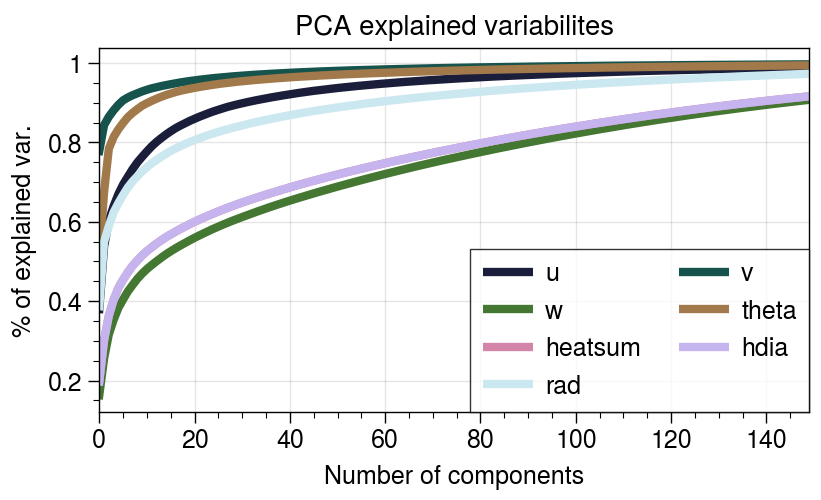

In [37]:
with sns.color_palette("cubehelix", n_colors=7):
    fig,ax = plot.subplots(ncols=1,nrows=1,axwidth=3.55,refaspect=1.951,sharey=3,sharex=0) 
    for inx,i in enumerate(['u', 'v', 'w', 'theta', 'heatsum', 'hdia', 'rad']):
        ax.plot(dict1[i].explained_variance_ratio_.cumsum(),lw=3,label=i)
    ax.format(title='PCA explained variabilites',xlabel='Number of components',ylabel='% of explained var.')
    ax.legend(loc=4,ncol=2)
    plt.savefig('../../figures/0406/pca_fig.png',dpi=300)
    plt.show()

In [9]:
[np.abs(dict1[i].explained_variance_ratio_.cumsum()-0.8).argmin() for i in ['u', 'v', 'w','qv', 'theta', 'heatsum', 'hdia', 'rad','ir']]

[12, 0, 90, 27, 3, 81, 81, 19, 17]

#### Produce Input Dataset

In [7]:
def forward_diff(arrayin=None,delta=None,axis=None,LT=1):
    result = []
    if axis==0:
        for i in range(0,arrayin.shape[axis]-LT):
            temp = (arrayin[i+LT,:]-arrayin[i,:])/(LT*delta)
            result.append(temp)
        return np.asarray(result)
    
def myPCA_projection_sen(pca_dict=None,varname=None,toproj_flatvar=None,orig_flatvar=None):
    pca_orig = pca_dict[varname].transform(orig_flatvar)
    if pca_dict[varname].mean_ is not None:
        orig_mean = pca_dict[varname].mean_
    projvar_transformed = np.dot(toproj_flatvar-np.nanmean(toproj_flatvar,axis=0),pca_dict[varname].components_.T)
    del orig_mean
    gc.collect()
    return pca_orig, projvar_transformed

class input_output:
    def __init__(self,PCAdict=None,folderpath=None,ts_varname=None,nummem=None):
        self.PCAdict = PCAdict
        self.varname=ts_varname
        self.nummem = nummem # u: 36 (40% variability in du), v:16/32 (40% dv var;50%), w:44 (40% dw var)
    
    ###################################################################################################################################################
    # Produce time series
    ###################################################################################################################################################    
    def produce_timeseries(self,flatvar=None):
        ts_dict = {}
        for indx,obj in tqdm(enumerate(self.varname)):
            ts_dict[obj] = self.PCAdict[obj].transform(flatvar[obj].data)[:,0:self.nummem[indx]]
        return ts_dict
    
    def produce_Qsentimeseries(self,senvar_name=None,refvar_name='rad',numQ=None,flatvar=None,senflatvar=None):
        ts_dict = {}
        temp = [myPCA_projection_sen(pca_dict=self.PCAdict,varname=refvar_name,toproj_flatvar=senflatvar[obj].data,orig_flatvar=flatvar[refvar_name].data)[1][:,0:numQ] for indx,obj in enumerate(senvar_name)]
        return dict(zip(senvar_name,temp))
    
    def normalize_timeseries(self,timeseries=None):
        assert timeseries['u'].shape[-1]==50,"var shape error"
        ts_dict = {}
        for indx,obj in tqdm(enumerate(self.varname)):
            ts_dict[obj] = (timeseries[obj]-np.nanmean(timeseries[obj],axis=0))/np.nanstd(timeseries[obj],axis=0)
        return ts_dict
    
    def normalize_timeseries_decomp(self,sentimeseries=None,reftimeseries=None,senvarnames=None,refvarname='rad'):
        ts_dict = {}
        meanstd_dict = {}
        for indx,obj in tqdm(enumerate(senvarnames)):
            tempf = -np.mean(sentimeseries[obj],axis=0)/np.std(reftimeseries[refvarname],axis=0)
            ts_dict[obj] = (sentimeseries[obj]-np.mean(sentimeseries[obj],axis=0))/np.std(reftimeseries[refvarname],axis=0)
            meanstd_dict[obj] = np.broadcast_to(tempf, (sentimeseries[obj].shape[0], sentimeseries[obj].shape[1]))
        return ts_dict,meanstd_dict
    
    ###################################################################################################################################################
    # Produce Input Dataset
    ###################################################################################################################################################      
    def _back_to_exp(self,timeseries=None,divider=None):
        printout = [timeseries[0:divider[0],:]]
        for i in range(1,19):
            printout.append(timeseries[divider[i-1]:divider[i],:])
        printout.append(timeseries[divider[-2]:,:])
        return printout
    
    def back_to_exp(self,inputlong=None,divider=None,senvarname=None):
        ts_dict = {}
        if senvarname is None:
            for indx,obj in tqdm(enumerate(self.varname)):
                ts_dict[obj] = self._back_to_exp(inputlong[obj],divider)
        else:
            for indx,obj in tqdm(enumerate(senvarname)):
                ts_dict[obj] = self._back_to_exp(inputlong[obj],divider)            
        return ts_dict
    
    def train_valid_test(self,expvarlist=None,validindex=None,testindex=None,concat='Yes'):
        X_valid, X_test = [expvarlist[i] for i in validindex], [expvarlist[i] for i in testindex]
        X_traint = expvarlist.copy()
        popindex = validindex+testindex
        #[X_train.pop(i) for i in validindex]
        #[X_train.pop(i) for i in testindex]
        X_train = [X_traint[i] for i in range(len(X_traint)) if i not in popindex]
        assert len(X_train)==16, 'wrong train-valid-test separation!'
        if concat=='Yes':
            return np.concatenate([X_train[i] for i in range(len(X_train))],axis=0), np.concatenate([X_valid[i] for i in range(len(X_valid))],axis=0), np.concatenate([X_test[i] for i in range(len(X_test))],axis=0)
        else:
            return X_train, X_valid, X_test
    
    def make_X(self,expvarlist=None,varwant=None,validindex=None,testindex=None,concat='Yes'):
        trainlist,validlist,testlist = [],[],[]
        for obj in varwant:
            test1,test2,test3 = self.train_valid_test(expvarlist[obj],validindex,testindex,'Yes')
            trainlist.append(test1)
            validlist.append(test2)
            testlist.append(test3)
        return np.concatenate([trainlist[i] for i in range(len(trainlist))],axis=1), np.concatenate([validlist[i] for i in range(len(validlist))],axis=1), np.concatenate([testlist[i] for i in range(len(testlist))],axis=1)
    
    ###################################################################################################################################################
    # Produce Output Dataset
    ###################################################################################################################################################
    def get_time_diff_terms(self,inputvar=None,LT=None):
        def _get_time_diff(array=None,timedelta=60*60,LT=None):
            store = []
            for exp in array:
                a = forward_diff(exp,timedelta,0,LT)
                if a.shape[0]>0:
                    azero = np.zeros((LT,exp.shape[-1]))
                    store.append(np.concatenate((a,azero),axis=0))
                else:
                    store.append(np.zeros((exp.shape[0],exp.shape[-1])))
            return store
        
        storedict = {}
        for wantvar in ['u','v','w','theta']:
            storedict[wantvar] = _get_time_diff(array=inputvar[wantvar],LT=LT)
        return storedict
    
    def make_Y(self,inputdict=None,LDT=None,validindex=[1,6],testindex=[2,12]):
        def _make_Y(inputt=None):
            varTRAIN,varVALID,varTEST = [],[],[]
            for varobj in ['u','v','w','theta']:
                test1,test2,test3 = self.train_valid_test(expvarlist=inputt[varobj],validindex=validindex,testindex=testindex,concat='Yes')
                varTRAIN.append(test1)
                varVALID.append(test2)
                varTEST.append(test3)
            return np.concatenate([varTRAIN[i] for i in range(len(varTRAIN))],axis=1), np.concatenate([varVALID[i] for i in range(len(varVALID))],axis=1), np.concatenate([varTEST[i] for i in range(len(varTEST))],axis=1)
        test = [self.get_time_diff_terms(inputdict,int(LDTobj)) for LDTobj in LDT]
        return [_make_Y(timediffobj) for timediffobj in test]

##### Radiative components

In [ ]:
nummem=[50,38,91,28,8,82,82,20,18]
haiyan_pca_nonorml = input_output( dict1, None, ['rad'], nummem ).produce_Qsentimeseries(['LW','SW','LWC','SWC','IRLW','IRSW'],'rad',20,haiyan_data,haiyan_radcomp)
haiyan_pca_nonorml_rad = input_output( dict1, None, ['rad'], [20] ).produce_timeseries( haiyan_data )

In [12]:
swlw_dict,lwcswcir_dict = {k:v for k,v in haiyan_pca_nonorml.items() if k in ['LW','SW']},{k:v for k,v in haiyan_pca_nonorml.items() if k in ['LWC','SWC','IRLW','IRSW']}
swlw_decomp_norml,swlwMEAN_decomp_norml = input_output( dict1, None, ['rad'], [20] ).normalize_timeseries_decomp(swlw_dict,haiyan_pca_nonorml_rad,['LW','SW'],'rad')
lwcswcir_decomp_norml,lwcswcirMEAN_decomp_norml = input_output( dict1, None, ['rad'], [20] ).normalize_timeseries_decomp(lwcswcir_dict,haiyan_pca_nonorml_rad,['LWC','SWC','IRLW','IRSW'],'rad')
exp_pca_norml_swlw,exp_pca_norml_swlwMEAN = input_output(dict1,None,['rad'],[20]).back_to_exp(swlw_decomp_norml,divider,['LW','SW']),input_output(dict1,None,['rad'],[20]).back_to_exp(swlwMEAN_decomp_norml,divider,['LW','SW'])
exp_pca_norml_lwcswcir,exp_pca_norml_lwcswcirMEAN = input_output(dict1,None,['rad'],[20]).back_to_exp(lwcswcir_decomp_norml,divider,['LWC', 'SWC', 'IRLW', 'IRSW']),input_output(dict1,None,['rad'],[20]).back_to_exp(swlwMEAN_decomp_norml,divider,['LW','SW'])

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [28]:
from sklearn.metrics import explained_variance_score

In [39]:
def output_expvar(index=None):
    origvarv = np.dot(np.expand_dims(haiyan_pca_nonorml_rad['rad'][:,index],axis=1),np.expand_dims(dict1['rad'].components_[index],axis=0))
    output = []
    for obj in ['IRLW','IRSW','LWC','SWC']:
        testvarv = np.dot(np.expand_dims(haiyan_pca_nonorml[obj][:,index],axis=1),np.expand_dims(dict1['rad'].components_[index],axis=0))
        output.append(explained_variance_score(origvarv,testvarv))
    return output

In [41]:
output = []
for i in tqdm(range(7)):
    output.append(output_expvar(index=i))

  0%|          | 0/7 [00:00<?, ?it/s]

In [43]:
import pandas as pd
dset = pd.DataFrame(data={'IRLW':[obj[0] for obj in output],'IRSW':[obj[1] for obj in output],'LWC':[obj[2] for obj in output],'SWC':[obj[3] for obj in output]})

/tmp/ipykernel_2262976/1037857522.py:2: ProplotWarning: rc setting 'linewidth' was renamed to 'meta.width' in version 0.8.
  plot.rc.update({'axes.labelweight':'normal','tick.labelweight':'normal','figure.facecolor':'k','suptitle.color':'w','title.color':'w','fontname': 'Source Sans Pro', 'fontsize': 11,'linewidth':1.25})


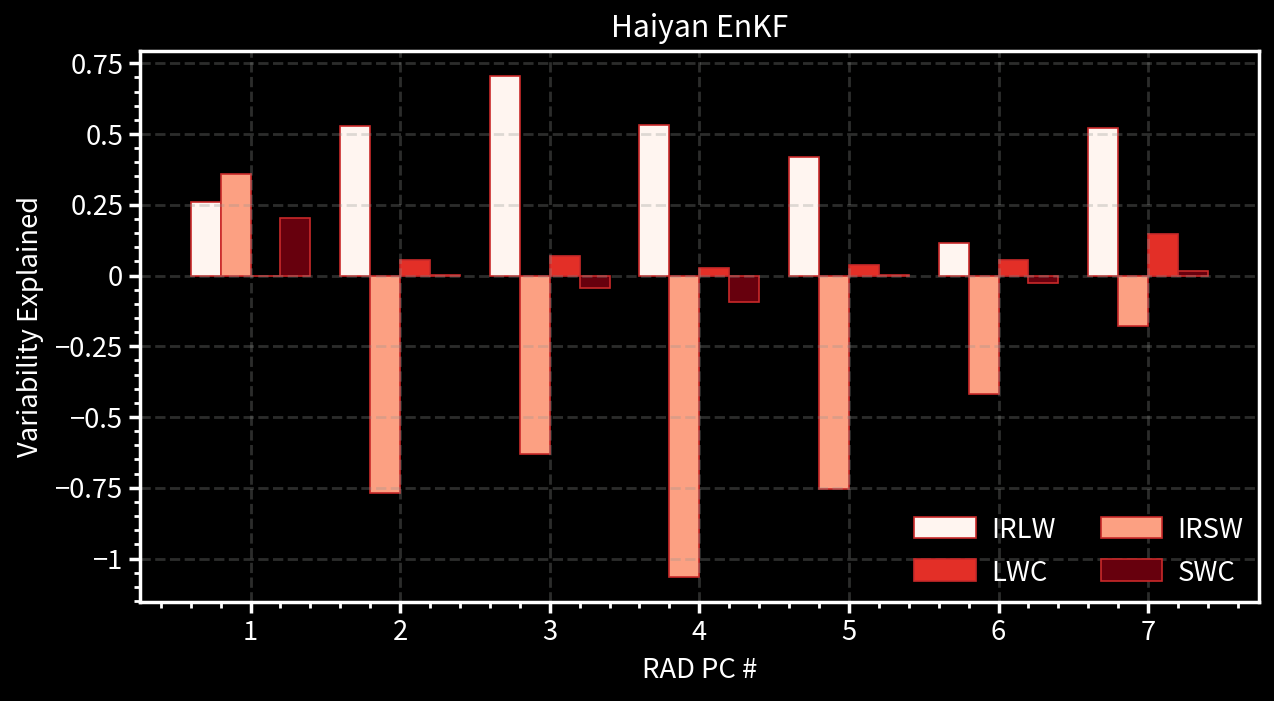

In [73]:
plot.rc.metacolor = 'w'
plot.rc.update({'axes.labelweight':'normal','tick.labelweight':'normal','figure.facecolor':'k','suptitle.color':'w','title.color':'w','fontname': 'Source Sans Pro', 'fontsize': 11,'linewidth':1.25})
plot.rc.axesfacecolor = 'k'

fig,axs = plot.subplots(ncols=1,nrows=1,axwidth=5.595,refaspect=2.031)
axs[0].bar(dset.values,cycle='Reds',legend='lr',edgecolor='red9',labels=list(dset.columns.values),legend_kw={'frameon':False,'ncols':2,'fontcolor':'w'})
axs[0].grid(alpha=0.3,color='gray',lw=1,ls='--')
axs.format(titleabove=True,ylabel='Variability Explained', xlabel='RAD PC #', xticks=[0,1,2,3,4,5,6],xticklabels=['1','2','3','4','5','6','7'],title='Haiyan EnKF')
plt.savefig('../../figures/0430/PCARADcomps_varcomps.png',dpi=300,facecolor=fig.get_facecolor(),transparent=True)
plt.show()

##### Plot

In [12]:
folderpath='/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/TCGphy/testML/output/haiyan/processed/'
read_and_proc.save_to_pickle(folderpath+'pca/decomp/SWLW_MEAN_'+'_'+'dict_g',exp_pca_norml_swlwMEAN,'PICKLE')
read_and_proc.save_to_pickle(folderpath+'pca/decomp/LWCSWCIR_MEAN_'+'_'+'dict_g',exp_pca_norml_lwcswcirMEAN,'PICKLE')

In [141]:
def transparent_linearcmap(cmap=None,ncolors=256,reverse=False):
    from matplotlib.colors import LinearSegmentedColormap
    color_array=cmap(range(ncolors))
    if reverse:
        color_array[:,-1] = np.linspace(1.0,0.0,ncolors)
    else:
        color_array[:,-1] = np.linspace(0.0,1.0,ncolors)
    return LinearSegmentedColormap.from_list(name='cmap_alpha',colors=color_array)

In [142]:
indigo9_alpha,red9_alpha = transparent_linearcmap(cmap=plot.Colormap('indigo4'),ncolors=256,reverse=False),transparent_linearcmap(cmap=plot.Colormap('red9'),ncolors=256,reverse=False)

/tmp/ipykernel_3835696/2218603188.py:2: ProplotWarning: rc setting 'linewidth' was renamed to 'meta.width' in version 0.8.
  plot.rc.update({'axes.labelweight':'normal','tick.labelweight':'normal','figure.facecolor':'k','suptitle.color':'w','title.color':'w','fontname': 'Source Sans Pro', 'fontsize': 11,'linewidth':1.25})


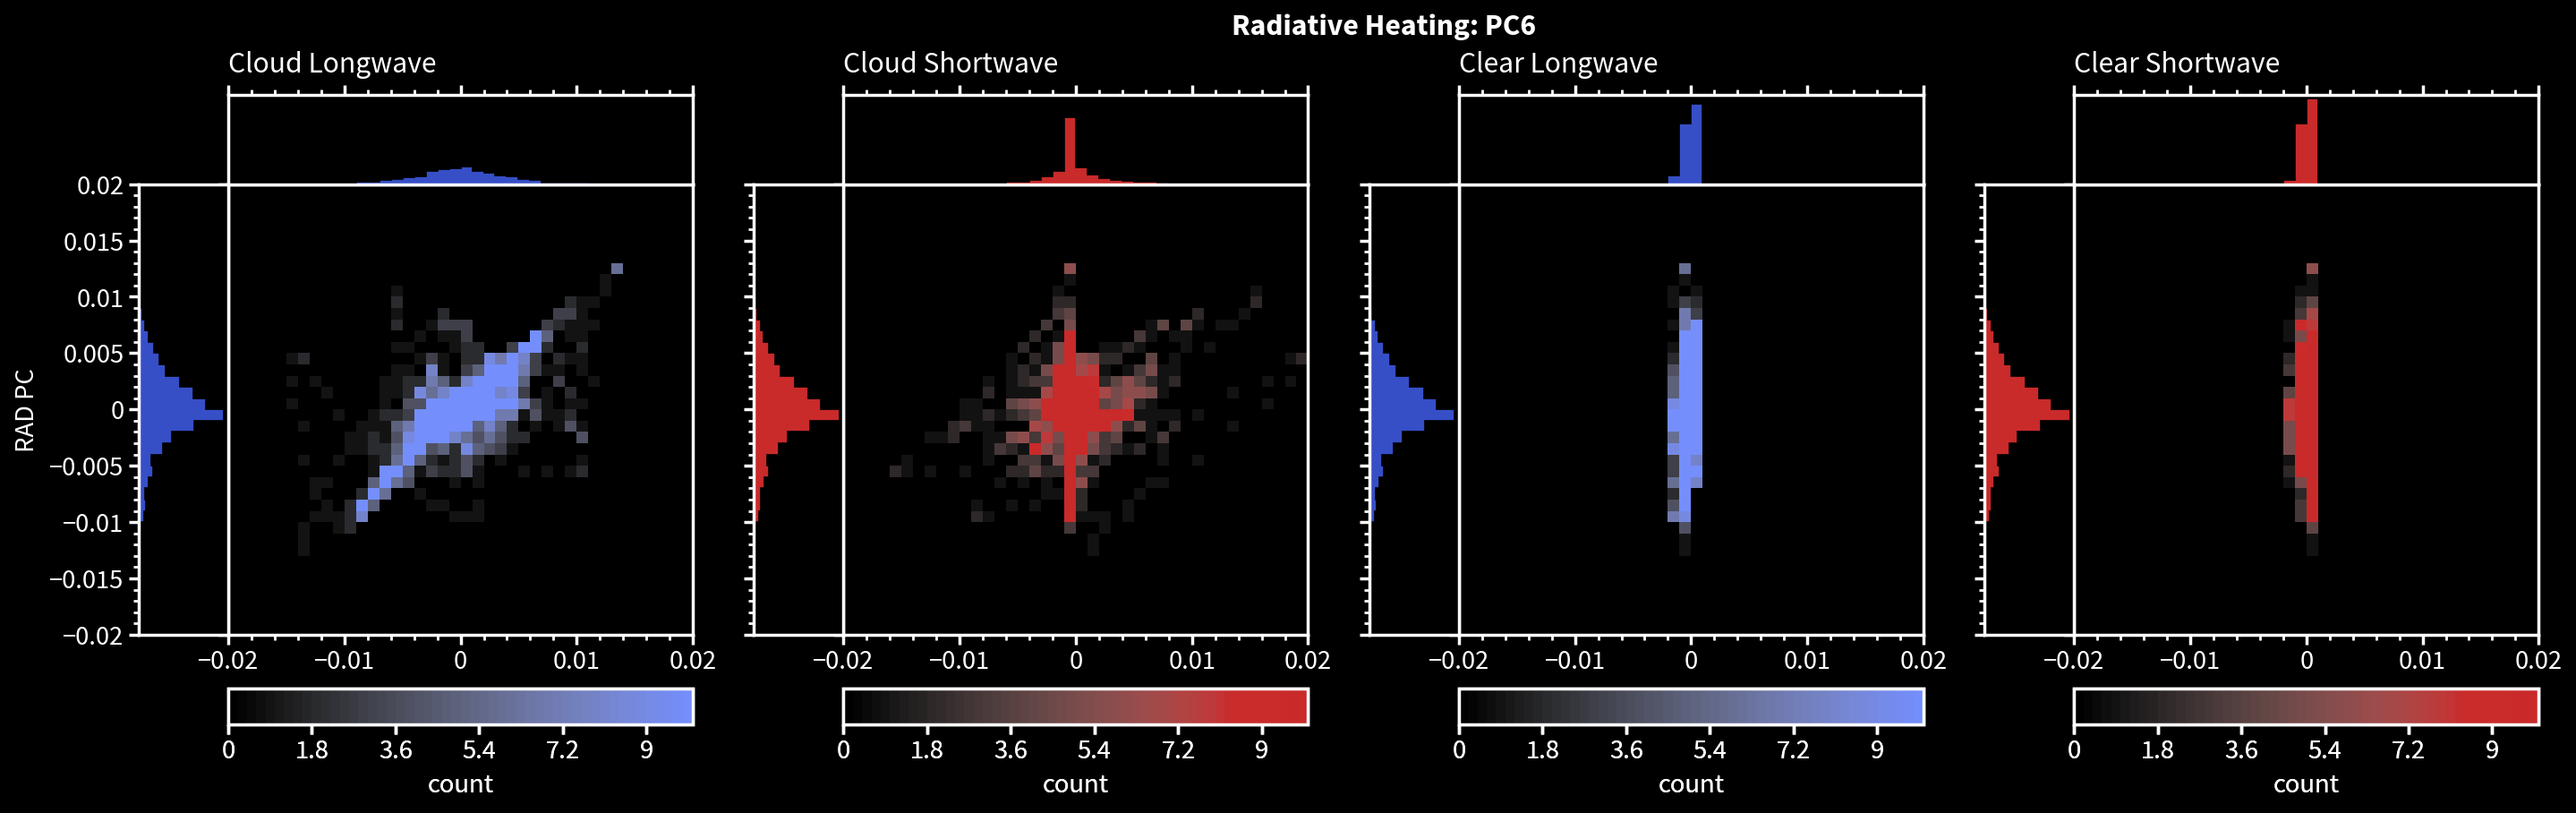

In [197]:
plot.rc.metacolor = 'w'
plot.rc.update({'axes.labelweight':'normal','tick.labelweight':'normal','figure.facecolor':'k','suptitle.color':'w','title.color':'w','fontname': 'Source Sans Pro', 'fontsize': 11,'linewidth':1.25})
plot.rc.axesfacecolor = 'k'

colors = ['indigo9', 'red9','indigo9', 'red9']
titles = ['Cloud Longwave', 'Cloud Shortwave', 'Clear Longwave', 'Clear Shortwave']
cmapobjects = [indigo9_alpha,red9_alpha,indigo9_alpha,red9_alpha]
bins = np.linspace(-0.02, 0.02, 41)
indx = 5
y = [haiyan_pca_nonorml['IRLW'][:,indx],haiyan_pca_nonorml['IRSW'][:,indx],haiyan_pca_nonorml['LWC'][:,indx],haiyan_pca_nonorml['SWC'][:,indx]]

fig, axs = plot.subplots(ncols=4,nrows=1,axwidth=2.595,refaspect=1.031)
axs.format(titleabove=True,ylabel='RAD PC', suptitle='Radiative Heating: PC'+str(int(indx+1)))

for indices in range(4):
    axs[indices].hist2d(y[indices], haiyan_pca_nonorml_rad['rad'][:,indx],bins, vmin=0, vmax=10, levels=50,cmap=cmapobjects[indices], colorbar='b', colorbar_kw={'label': 'count'})
    #color = plot.scale_luminance(color, 1.5)  # histogram colors
    px = axs[indices].panel('l', space=0)
    px.histh(haiyan_pca_nonorml_rad['rad'][:,indx], bins, color=colors[indices], fill=True, ec='k')
    px.format(grid=False, xlocator=[], xreverse=(which == 'l'))
    px = axs[indices].panel('t', space=0)
    px.hist(y[indices], bins, color=colors[indices], fill=True, ec='k')
    px.format(grid=False, ylocator=[], title=titles[indices], titleloc='l')
plt.savefig('../../figures/0406/PCARADcomps'+str(int(indx+1))+'_long.png',dpi=300,facecolor=fig.get_facecolor(),transparent=True)
plt.show()

##### Orig Input/Output

In [8]:
import random
rand_nums = random.sample(range(1,20),4)

In [9]:
rand_nums[0:2]+rand_nums[2:4]

[10, 1, 4, 17]

In [10]:
nummem=[50,38,91,28,8,82,82,20,18]
haiyan_pca_nonorml = input_output( dict1, None, ['u', 'v', 'w', 'qv','theta', 'heatsum', 'hdia', 'rad', 'ir'], nummem ).produce_timeseries( haiyan_data )
haiyan_pca_norml = input_output( dict1, None, ['u', 'v', 'w', 'qv','theta', 'heatsum', 'hdia', 'rad', 'ir'], nummem ).normalize_timeseries( haiyan_pca_nonorml )

exp_pca_norml = input_output( dict1, None, ['u', 'v', 'w', 'qv','theta', 'heatsum', 'hdia', 'rad', 'ir'], nummem ).back_to_exp( haiyan_pca_norml, divider ) 
exp_pca_nonorml = input_output( dict1, None, ['u', 'v', 'w', 'qv','theta', 'heatsum', 'hdia', 'rad', 'ir'], nummem ).back_to_exp( haiyan_pca_nonorml, divider ) 

for i in range(33):
    X_train, X_valid, X_test = (input_output(dict1,None,['u','v','w','qv','theta','heatsum','hdia','rad','ir'],nummem).make_X( exp_pca_norml,['u','v','w','theta','hdia','rad'],rand_nums[0:2],rand_nums[2:4],'Yes'))#[1,6], [2,12], 'Yes'))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [11]:
EXP = [['hdia','rad'],['theta','hdia','rad'],['u','v','w','theta','hdia','rad'],['u','v','theta','hdia','rad'],['u','v'],['u','v','w'],['u','v','hdia','rad'],['u','v','w','hdia','rad'],['u','v','w','theta','qv','hdia','rad']]
storename = ['dt','dtth','dtthuvw','dtthuv','uv','uvw','dtuv','dtuvw','dtthuvwqv']
import random

for i in tqdm(range(33)):
    rand_nums = random.sample(range(1,20),4)
    X_traindict,X_validdict,X_testdict = {},{},{}
    for ind,obj in enumerate(storename):
        test1,test2,test3 = (input_output(dict1,None,['u','v','w','qv','theta','heatsum','hdia','rad','ir'],None).make_X(exp_pca_norml,EXP[ind],rand_nums[0:2],rand_nums[2:4],'Yes'))
        X_traindict[obj] = test1
        X_validdict[obj] = test2
        X_testdict[obj] = test3
    folderpath='/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/TCGphy/testML/output/haiyan/processed/'
    read_and_proc.save_to_pickle(folderpath+'pca/X/random/3/Xtrain'+str(rand_nums[0])+'_'+str(rand_nums[1])+'_'+str(rand_nums[2])+'_'+str(rand_nums[3])+'_'+'dict_g',X_traindict,'PICKLE')
    read_and_proc.save_to_pickle(folderpath+'pca/X/random/3/Xvalid'+str(rand_nums[0])+'_'+str(rand_nums[1])+'_'+str(rand_nums[2])+'_'+str(rand_nums[3])+'_'+'dict_g',X_validdict,'PICKLE')
    read_and_proc.save_to_pickle(folderpath+'pca/X/random/3/Xtest'+str(rand_nums[0])+'_'+str(rand_nums[1])+'_'+str(rand_nums[2])+'_'+str(rand_nums[3])+'_'+'dict_g',X_testdict,'PICKLE')
    
    y_all = (input_output(dict1,None,['u','v','w','qv','theta','heatsum','hdia','rad','ir'],nummem).make_Y(exp_pca_nonorml,np.linspace(0,35,36)+1,rand_nums[0:2],rand_nums[2:4]))
    folderpath='/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/TCGphy/testML/output/haiyan/processed/'
    read_and_proc.save_to_pickle(folderpath+'pca/y/random/3/allY'+str(rand_nums[0])+'_'+str(rand_nums[1])+'_'+str(rand_nums[2])+'_'+str(rand_nums[3])+'_'+'dict_g',y_all,'PICKLE')

  0%|          | 0/33 [00:00<?, ?it/s]

In [13]:
print(f"Test set, percentage of samples:       {(np.sum([np.asarray([aobj[0] for aobj in a])[indx] for indx in [2,12]])/1565):.3f} \n"+
      f"Validation set, percentage of samples: {(np.sum([np.asarray([aobj[0] for aobj in a])[indx] for indx in [1,6]])/1565):.3f}")
print(f"\nSample/member: {np.asarray([aobj[0] for aobj in a])}",)

Test set, percentage of samples:       0.102 
Validation set, percentage of samples: 0.118

Sample/member: [103  77  87 111  95  84 107  87  35  32 106  67  72  87 100  37  84  88
  80  26]
